In [1]:
import datetime
today = datetime.date.today()
date = str(today)
#date = "2020-03-26"

#url = "https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-%s.xlsx" % date
url = "https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx"

import pandas as pd
data = pd.read_excel(url)

In [2]:
countries = ['DE', 'ES', 'FR', 'IT', 'SE', 'UK', 'US', 'KR', 'JP', 'CN', 'IN']

import math
def rawData(df, title):
    cases = pd.DataFrame(columns = ['Date'])

    for country in countries:
        countryData = df[df['geoId'] == country][['dateRep', title]]
        countryData.columns = ['Date', country]
        cases = pd.merge(cases, countryData, on='Date', how='right')
        cases = cases.fillna(0)

    return cases.sort_values(by=['Date'])

def sumData(df):
    a = df[countries].to_numpy()

    for i in range(1, df.shape[0]):
        a[i] = a[i] + a[i - 1]

    return pd.DataFrame(data=a, index=cases['Date'], columns=countries)

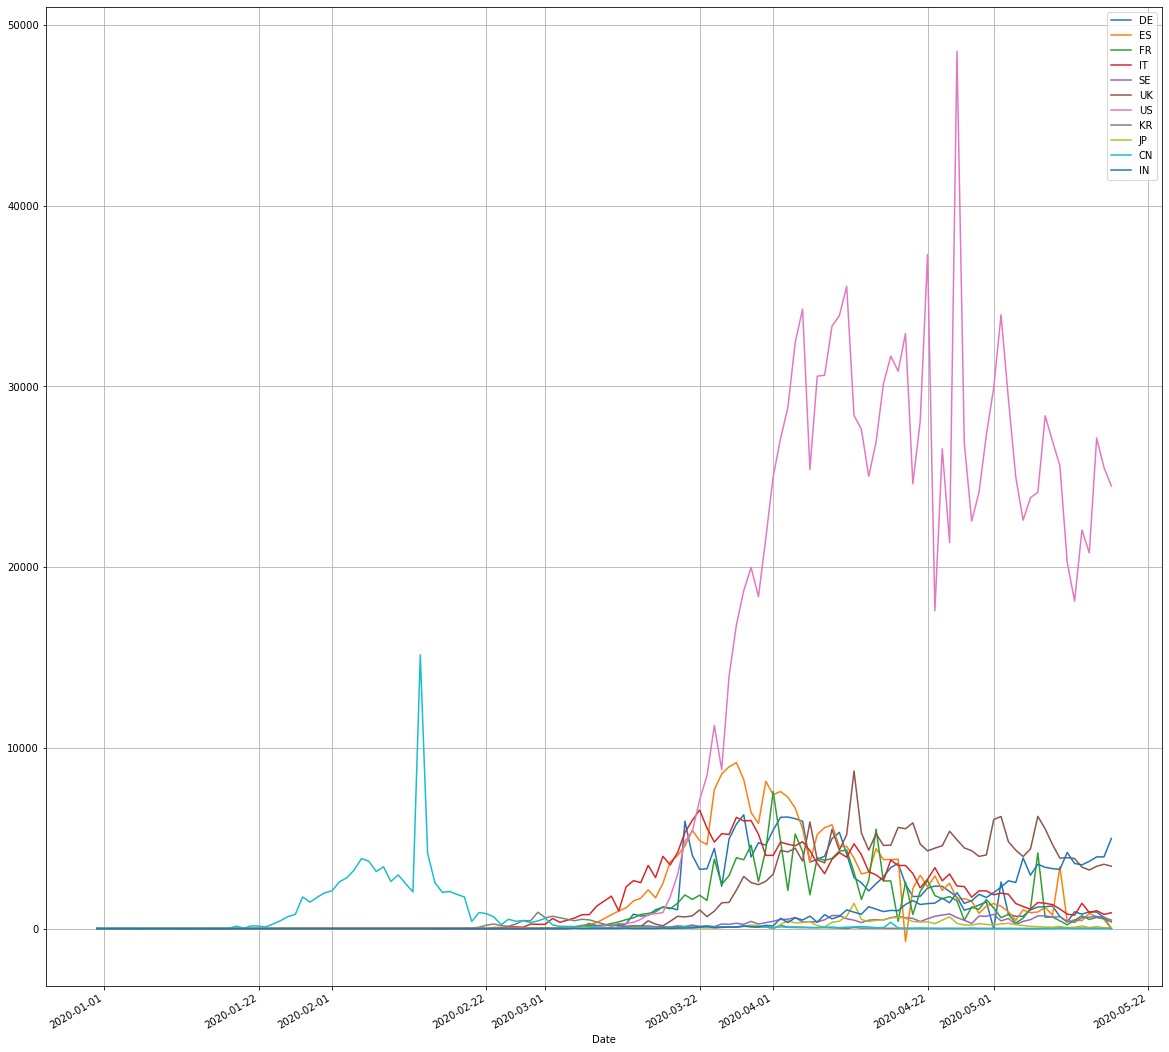

In [3]:
cases = rawData(data, 'cases')
cases.plot.line(x='Date', y=countries, figsize=(20, 20), grid=True)

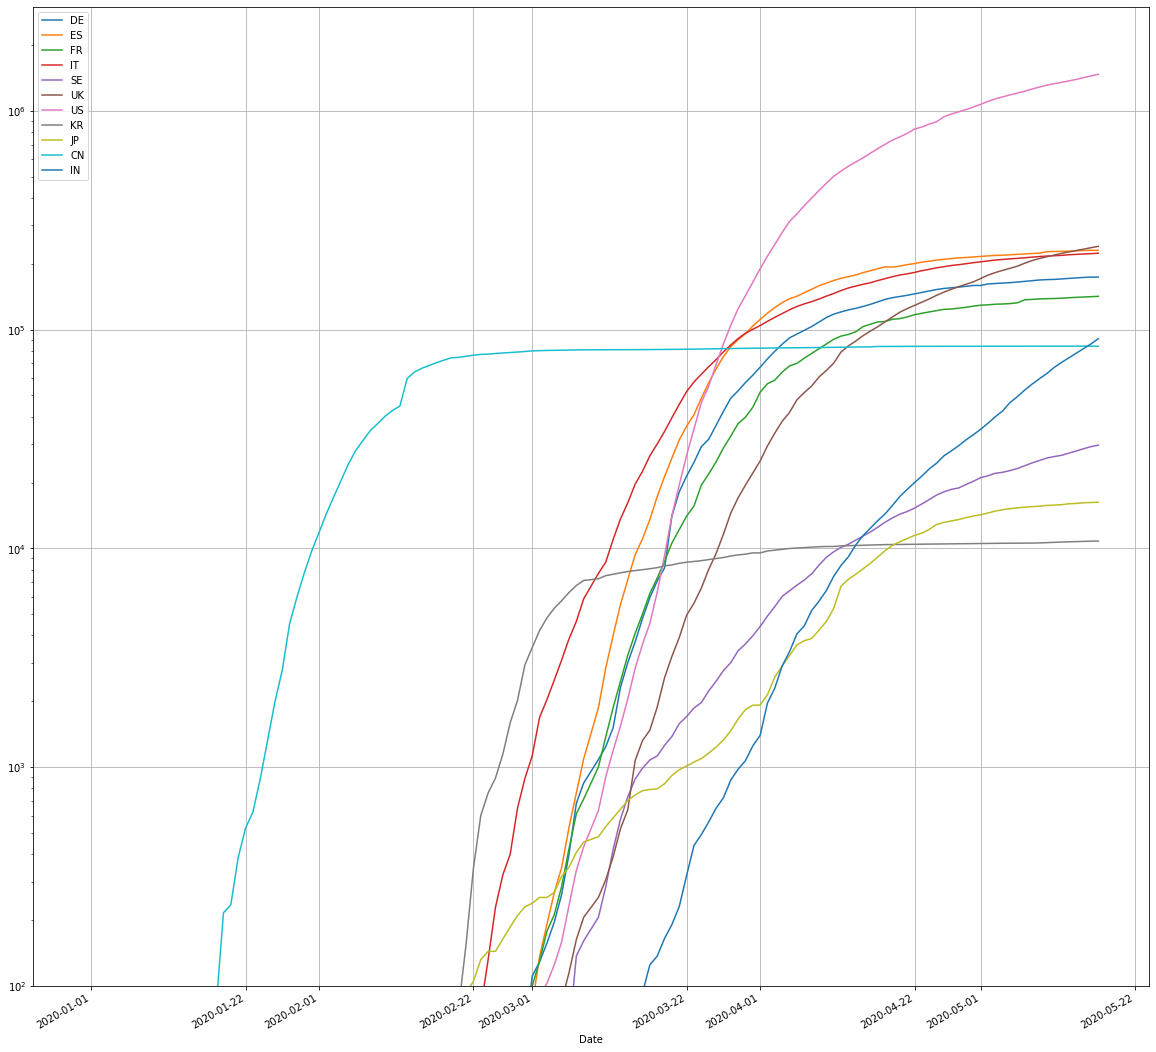

In [4]:
sumCases = sumData(cases)
sumCases.plot.line(logy=True, figsize=(20, 20), ylim=(100, None), grid=True)

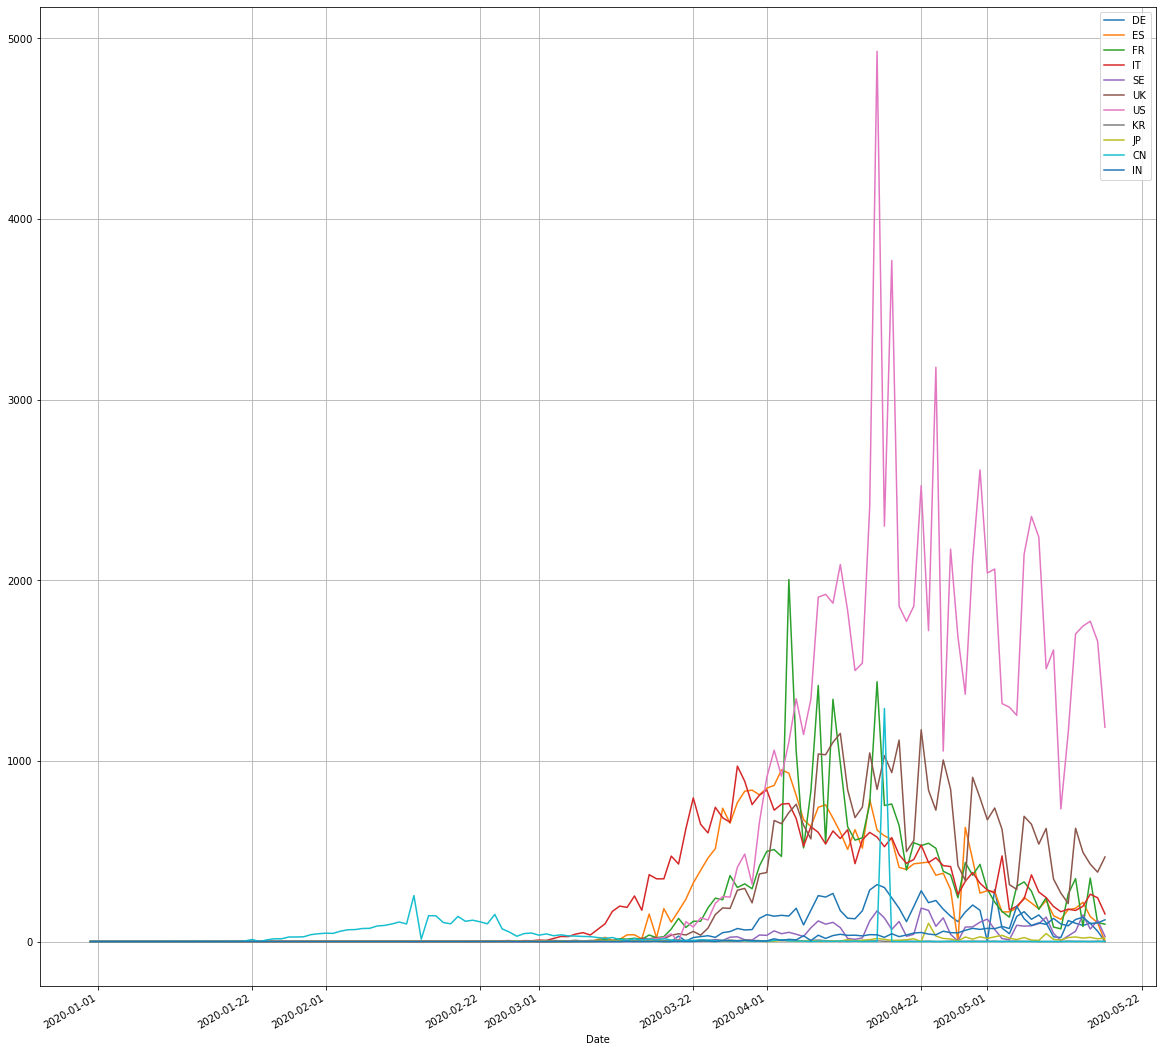

In [5]:
deaths = rawData(data, 'deaths')
deaths.plot.line(x='Date', y=countries, figsize=(20, 20), grid=True)

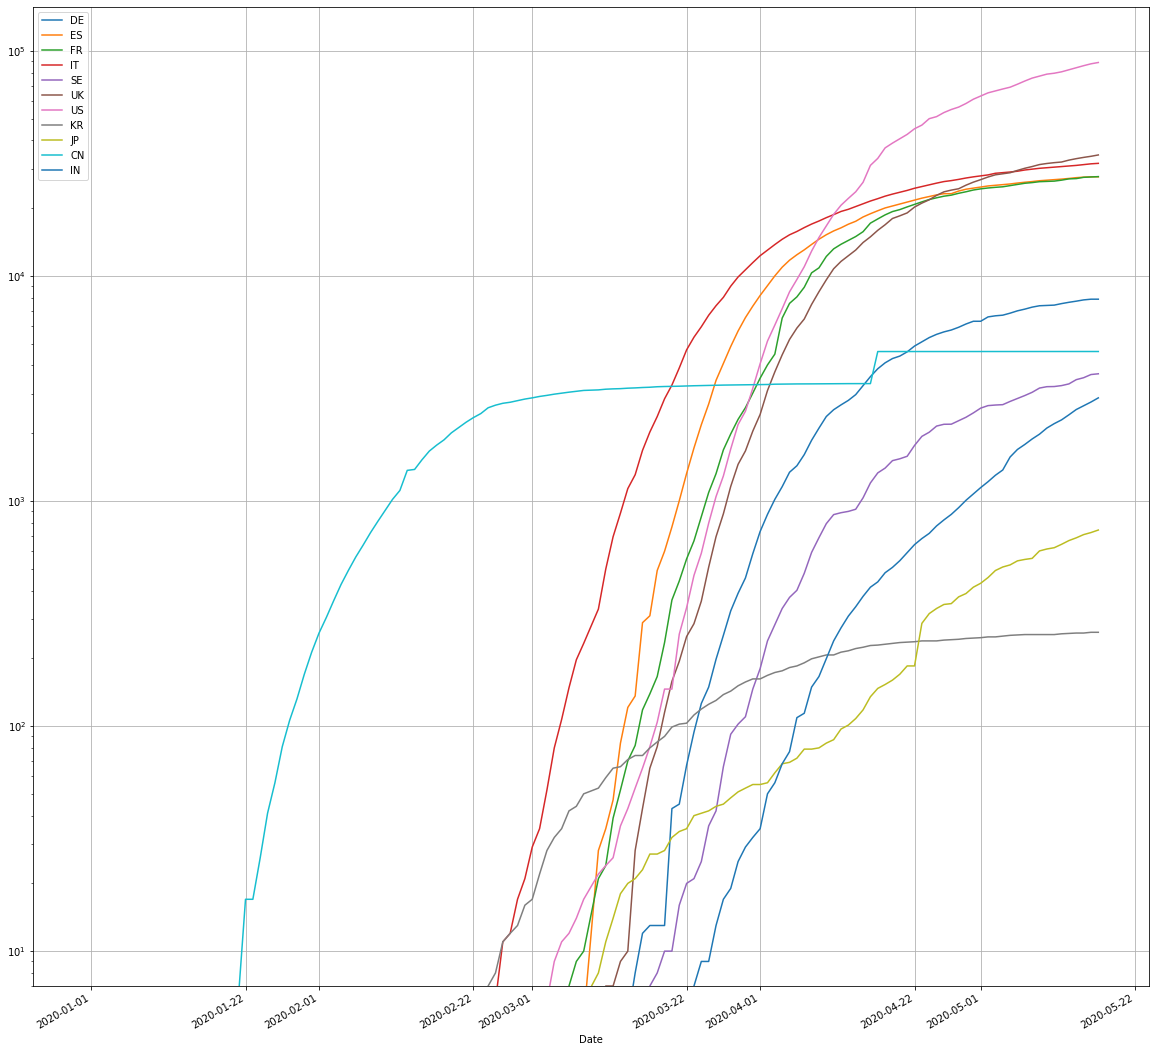

In [6]:
sumDeaths = sumData(deaths)
sumDeaths.plot.line(logy=True, figsize=(20, 20), ylim=(7, None), grid=True)

In [7]:
cases.tail(15)

,Date,DE,ES,FR,IT,SE,UK,US,KR,JP,CN,IN
13,2020-05-03,793.0,935.0,794,1900,562,4806,29288,13,295,2,2644
12,2020-05-04,679.0,466.0,308,1389,235,4339,24972,8,218,3,2553
11,2020-05-05,685.0,1039.0,576,1221,404,3985,22593,3,174,2,3900
10,2020-05-06,1037.0,880.0,1104,1075,495,4406,23841,2,123,2,2958
9,2020-05-07,1194.0,921.0,4183,1444,702,6211,24128,4,109,2,3561
8,2020-05-08,1209.0,1173.0,629,1401,705,5514,28369,12,84,6,3390
7,2020-05-09,1251.0,743.0,642,1327,642,4649,26957,18,81,0,3320
6,2020-05-10,667.0,3416.0,433,1083,656,3896,25612,34,119,15,3277
5,2020-05-11,357.0,393.0,209,802,401,3923,20258,35,51,19,4213
4,2020-05-12,933.0,482.0,456,744,348,3877,18117,27,76,1,3604


In [8]:
sumCases.tail(15)

,DE,ES,FR,IT,SE,UK,US,KR,JP,CN,IN
Date,,,,,,,,,,,
2020-05-03,162441.0,218306.0,130569.0,207836.0,22040.0,182193.0,1132948.0,10545.0,14806.0,83916.0,39980.0
2020-05-04,163120.0,218772.0,130877.0,209225.0,22275.0,186532.0,1157920.0,10553.0,15024.0,83919.0,42533.0
2020-05-05,163805.0,219811.0,131453.0,210446.0,22679.0,190517.0,1180513.0,10556.0,15198.0,83921.0,46433.0
2020-05-06,164842.0,220691.0,132557.0,211521.0,23174.0,194923.0,1204354.0,10558.0,15321.0,83923.0,49391.0
2020-05-07,166036.0,221612.0,136740.0,212965.0,23876.0,201134.0,1228482.0,10562.0,15430.0,83925.0,52952.0
2020-05-08,167245.0,222785.0,137369.0,214366.0,24581.0,206648.0,1256851.0,10574.0,15514.0,83931.0,56342.0
2020-05-09,168496.0,223528.0,138011.0,215693.0,25223.0,211297.0,1283808.0,10592.0,15595.0,83931.0,59662.0
2020-05-10,169163.0,226944.0,138444.0,216776.0,25879.0,215193.0,1309420.0,10626.0,15714.0,83946.0,62939.0
2020-05-11,169520.0,227337.0,138653.0,217578.0,26280.0,219116.0,1329678.0,10661.0,15765.0,83965.0,67152.0


In [9]:
deaths.tail(15)

,Date,DE,ES,FR,IT,SE,UK,US,KR,JP,CN,IN
13,2020-05-03,74.0,164.0,166,474,16,621,1317,0,34,0,83
12,2020-05-04,43.0,164.0,135,174,10,315,1297,2,18,0,72
11,2020-05-05,139.0,185.0,306,195,90,288,1252,2,11,0,195
10,2020-05-06,165.0,244.0,330,236,85,693,2144,1,22,0,126
9,2020-05-07,123.0,213.0,278,369,87,649,2353,1,8,0,89
8,2020-05-08,147.0,181.0,178,274,99,539,2239,0,6,0,103
7,2020-05-09,103.0,227.0,243,243,135,626,1510,0,44,0,95
6,2020-05-10,26.0,143.0,80,194,45,346,1614,0,12,0,128
5,2020-05-11,22.0,123.0,70,165,5,268,734,0,8,0,97
4,2020-05-12,116.0,176.0,263,179,31,210,1156,2,22,0,87


In [10]:
sumDeaths.tail(15)

,DE,ES,FR,IT,SE,UK,US,KR,JP,CN,IN
Date,,,,,,,,,,,
2020-05-03,6649.0,25264.0,24751.0,28577.0,2669.0,28131.0,66381.0,249.0,491.0,4614.0,1301.0
2020-05-04,6692.0,25428.0,24886.0,28751.0,2679.0,28446.0,67678.0,251.0,509.0,4614.0,1373.0
2020-05-05,6831.0,25613.0,25192.0,28946.0,2769.0,28734.0,68930.0,253.0,520.0,4614.0,1568.0
2020-05-06,6996.0,25857.0,25522.0,29182.0,2854.0,29427.0,71074.0,254.0,542.0,4614.0,1694.0
2020-05-07,7119.0,26070.0,25800.0,29551.0,2941.0,30076.0,73427.0,255.0,550.0,4614.0,1783.0
2020-05-08,7266.0,26251.0,25978.0,29825.0,3040.0,30615.0,75666.0,255.0,556.0,4614.0,1886.0
2020-05-09,7369.0,26478.0,26221.0,30068.0,3175.0,31241.0,77176.0,255.0,600.0,4614.0,1981.0
2020-05-10,7395.0,26621.0,26301.0,30262.0,3220.0,31587.0,78790.0,255.0,612.0,4614.0,2109.0
2020-05-11,7417.0,26744.0,26371.0,30427.0,3225.0,31855.0,79524.0,255.0,620.0,4614.0,2206.0
